In [221]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [222]:
n_task_per_file = 20
n_files = 10
base_dir = "noise_sd=1/vary_r_noisesd_1.0_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [223]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [224]:
coverage_df

,5.00,10.00,20.00,0.05,0.10,0.20
0,0.857143,0.666667,0.666667,0.833333,0.000000,0.500000
1,1.000000,0.833333,0.833333,0.833333,0.833333,0.333333
2,0.666667,0.833333,0.833333,0.714286,0.428571,0.666667
3,0.833333,0.333333,0.333333,0.714286,0.666667,0.857143
4,0.600000,0.833333,0.600000,0.600000,0.400000,1.000000
...,...,...,...,...,...,...
5,0.833333,0.666667,0.714286,0.500000,0.800000,0.833333
6,0.500000,0.200000,0.833333,0.800000,0.200000,0.600000
7,0.800000,0.666667,0.666667,0.600000,0.800000,0.833333
8,0.714286,0.400000,0.500000,0.500000,0.333333,1.000000


In [225]:
length_df

,5.00,10.00,20.00,0.05,0.10,0.20
0,3.180297,3.184390,3.873337,2.313064,2.170057,1.705919
1,3.246506,2.914796,2.197833,2.382716,2.542530,1.862491
2,2.693106,2.377240,2.960247,2.873234,2.368464,2.108202
3,2.471514,3.678098,2.826374,2.688338,1.975397,1.759995
4,2.459331,2.110443,3.004526,2.415135,1.615681,2.452889
...,...,...,...,...,...,...
5,3.403122,3.273386,2.211133,2.889566,2.186411,1.960786
6,2.684600,2.896304,2.231430,3.000781,1.507359,1.633240
7,2.572789,3.082952,2.042778,2.436162,2.624239,2.130146
8,2.734327,2.348515,2.436709,2.726109,3.048214,2.427099


In [226]:
MSE_df

,5.00,10.00,20.00,0.05,0.10,0.20
0,5.099341,4.470659,4.749366,4.519107,4.790274,4.612161
1,4.594842,4.454604,4.272533,4.539768,4.605258,4.455933
2,4.720261,4.637741,4.602204,4.411590,4.693325,4.835533
3,5.251753,5.052439,4.917542,4.893801,4.672628,5.297046
4,3.949075,4.111491,4.008867,4.360243,4.257752,4.452203
...,...,...,...,...,...,...
5,4.026455,3.981731,3.895591,3.935527,3.932290,4.119669
6,5.509331,5.468372,5.368750,5.284432,5.434939,5.273455
7,4.146158,4.124584,4.390389,4.460143,4.411284,4.274123
8,4.880436,4.406052,4.459333,4.437943,4.659643,4.956642


In [227]:
def boxplots(dfs, metrics):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        sns.boxplot(data=df, ax=axes[i], showmeans=True)
        axes[i].set_title(f'Boxplot for {metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        """for j, mean in enumerate(means):
            print(j, mean)
            axes[i].plot(j, mean, marker='^', color='red', markersize=10)  # Add a red triangle for the mean"""
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
        elif metric == "Length":
            axes[i].set_ylim(0,20)
        elif metric == "MSE":
            axes[i].set_ylim(0,10)
    
    # Show the plots
    plt.tight_layout()
    plt.show()

Coverage :
 5.00     0.755709
10.00    0.655351
20.00    0.677368
0.05     0.712289
0.10     0.724936
0.20     0.680184
dtype: float64
Length :
 5.00     2.845210
10.00    3.041422
20.00    2.774794
0.05     2.639826
0.10     2.368388
0.20     1.934605
dtype: float64
MSE :
 5.00     4.740828
10.00    4.680359
20.00    4.702515
0.05     4.670232
0.10     4.648964
0.20     4.709572
dtype: float64


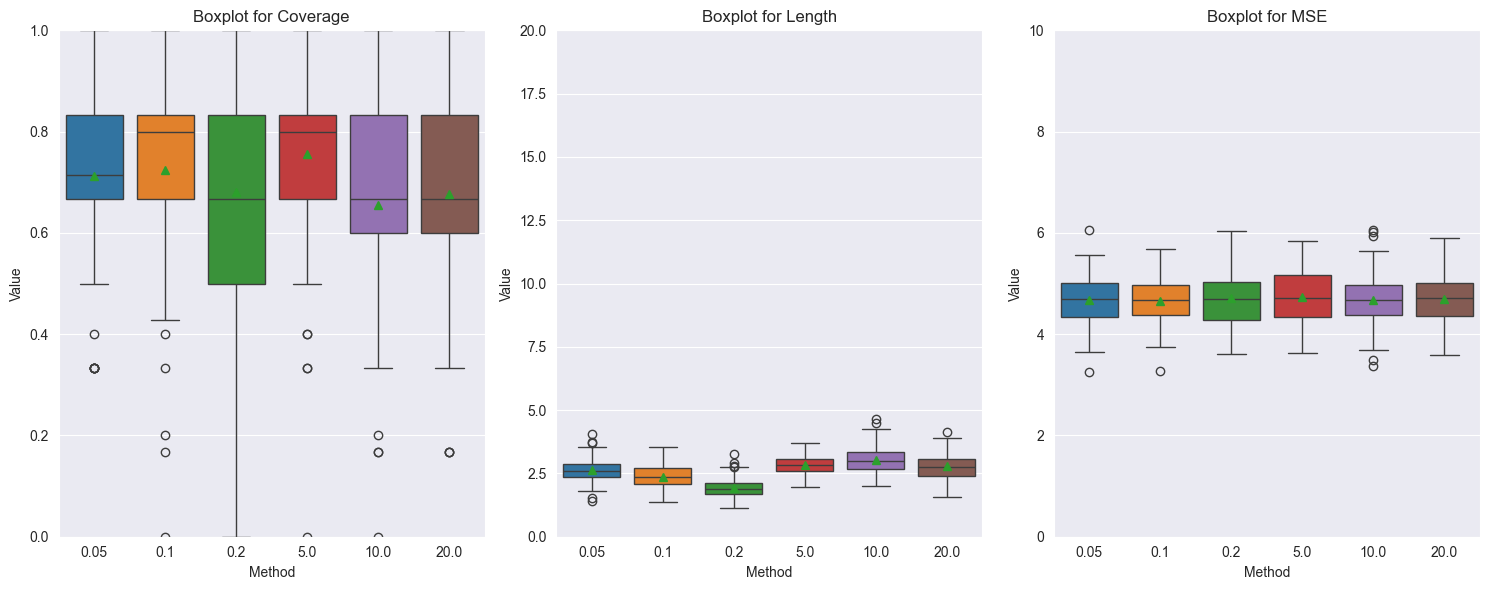

In [228]:
boxplots(dfs=[coverage_df, length_df, MSE_df], metrics=["Coverage", "Length", "MSE"])

Coverage :
 5.00     0.883546
10.00    0.875410
20.00    0.813921
0.05     0.647558
0.10     0.468267
0.20     0.422766
dtype: float64
Length :
 5.00     1.747530
10.00    1.741557
20.00    1.741194
0.05     1.689401
0.10     1.598789
0.20     1.482754
dtype: float64
MSE :
 5.00     5.306567
10.00    5.354769
20.00    5.337974
0.05     5.398139
0.10     5.367357
0.20     5.329066
dtype: float64


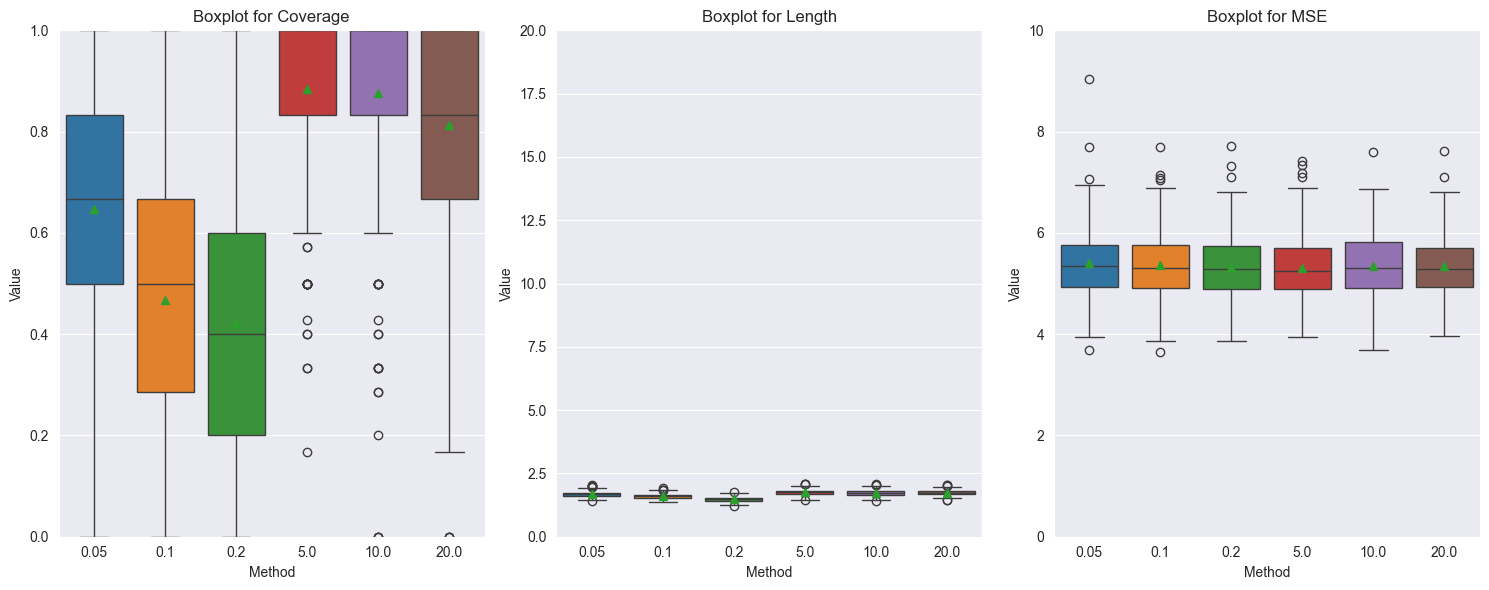

In [178]:
boxplots(dfs=[coverage_df, length_df, MSE_df], metrics=["Coverage", "Length", "MSE"])

In [155]:
coverage_df

,5.00,10.00,20.00,0.05,0.10,0.20
0,0.714286,1.000000,1.000000,1.000000,1.000000,0.833333
1,0.833333,0.833333,0.833333,1.000000,1.000000,0.500000
2,0.500000,0.833333,1.000000,0.333333,0.833333,0.833333
3,0.833333,1.000000,0.857143,0.500000,0.833333,1.000000
4,0.600000,1.000000,0.800000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...
4,1.000000,1.000000,1.000000,1.000000,0.833333,0.833333
5,0.833333,1.000000,1.000000,0.857143,0.600000,0.833333
6,1.000000,1.000000,1.000000,0.800000,0.833333,1.000000
7,1.000000,1.000000,1.000000,0.166667,1.000000,0.800000
